<a href="https://colab.research.google.com/github/Sid-Yo/GRIP-The_Sparks_Foundation_DS/blob/master/GRIP_TSF_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 5: To explore Business Analytics
- Perform ‘Exploratory Data Analysis’ on the provided dataset
SampleSuperstore
- You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data?

#### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


{'SampleSuperstore.csv': b'Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit\r\nSecond Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0,41.9136\r\nSecond Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0,219.582\r\nSecond Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0,6.8714\r\nStandard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.031\r\nStandard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164\r\nStandard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.86,7,0,14.1694\r\nStandard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.28,4,0,1.9656\r\nStandard Class,Consumer,United States,Los Angeles,California,90032

#### Exploring dataset

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.drop_duplicates(keep = "first",inplace = True)

#### Visualizing dataset

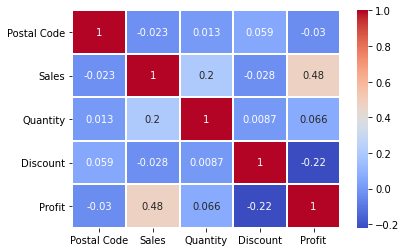

In [7]:
sns.heatmap(df.corr(),linewidths=1,annot=True,square=False,cmap="coolwarm")

In [8]:
country = pd.Series(np.array(df['Country']))
country.describe()

count              9977
unique                1
top       United States
freq               9977
dtype: object

In [9]:
city = pd.Series(np.array(df['City']))
city.describe()

count              9977
unique              531
top       New York City
freq                914
dtype: object

In [10]:
category = pd.Series(np.array(df['Category']))
category.describe()

count                9977
unique                  3
top       Office Supplies
freq                 6012
dtype: object

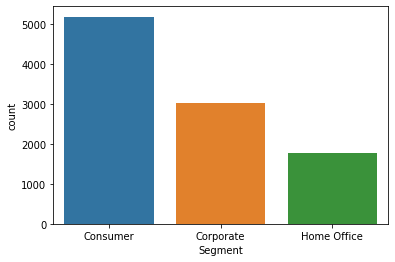

In [11]:
sns.countplot(df['Segment'])
plt.show()

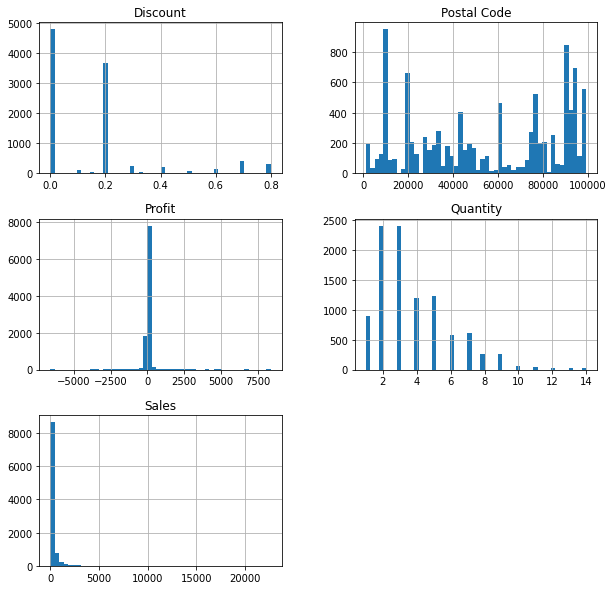

In [12]:
df.hist(figsize=(10,10),bins=50)
plt.show()

#### Exploration Stuff

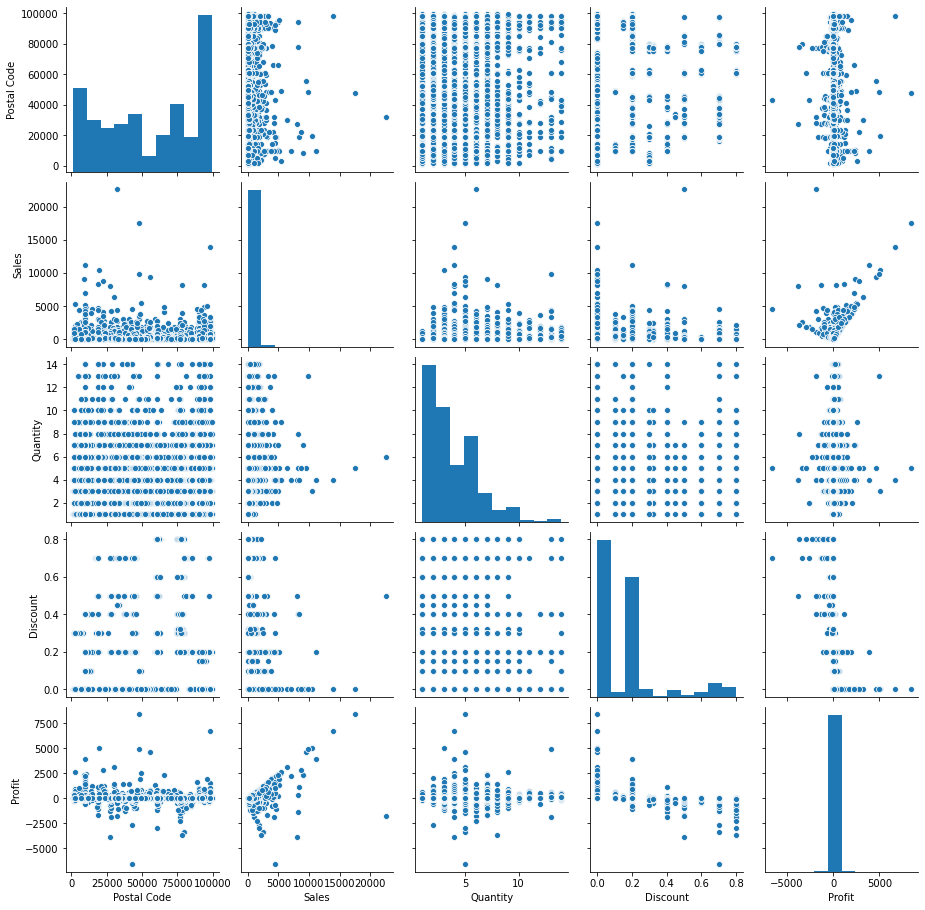

In [13]:
sns.pairplot(df)
plt.show()

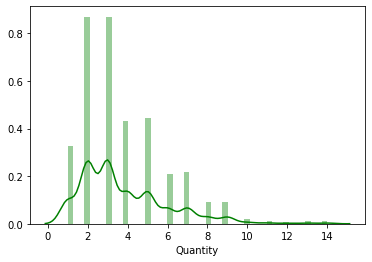

In [14]:
sns.distplot(df['Quantity'], color= 'green')
plt.show()

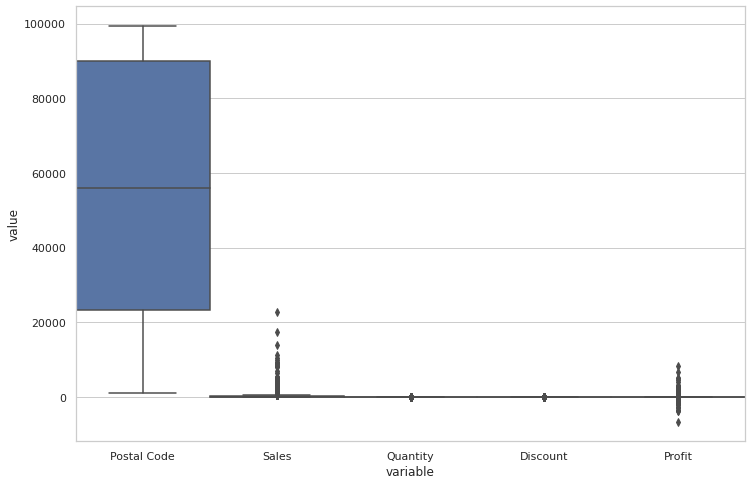

In [15]:
df_con=df.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)

plt.show()

In [16]:
#Removing outliners
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [17]:
remove_outlier(df,k=3.33)

In [18]:
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
ds.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000
mean,55243.565173,196.570036,3.776519,0.155131,24.150294
std,32060.297300,383.949264,2.222506,0.204991,94.164961
min,1040.000000,0.444000,1.000000,0.000000,-734.526400
25%,23223.000000,17.088000,2.000000,0.000000,1.747200
50%,57103.000000,52.990000,3.000000,0.200000,8.611200
75%,90008.000000,203.520000,5.000000,0.200000,28.857600
max,99301.000000,8187.650000,14.000000,0.800000,793.716000


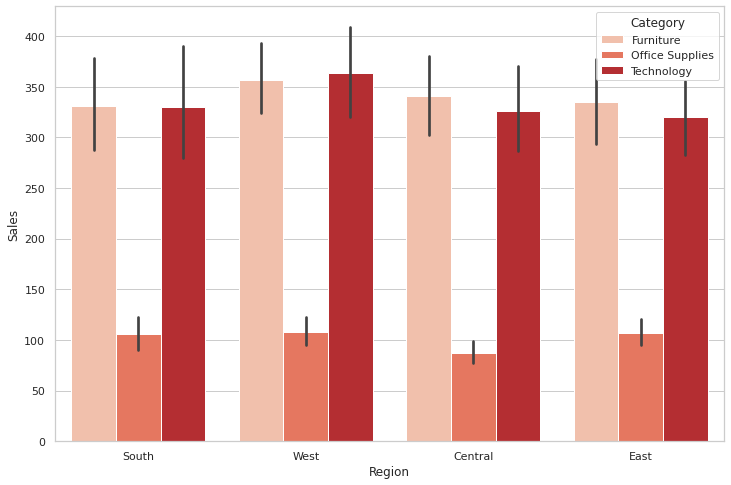

In [20]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Reds")

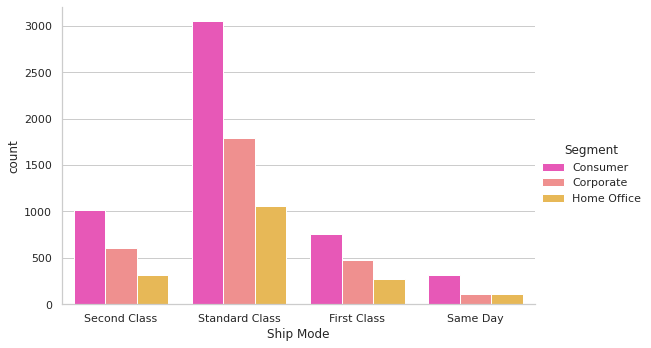

In [21]:
#Segment wise count of the ship modes
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="spring")

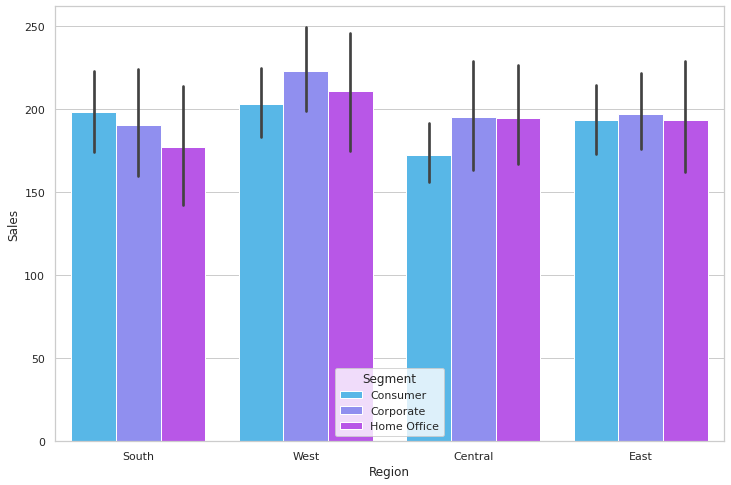

In [22]:
#Segment wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="cool")

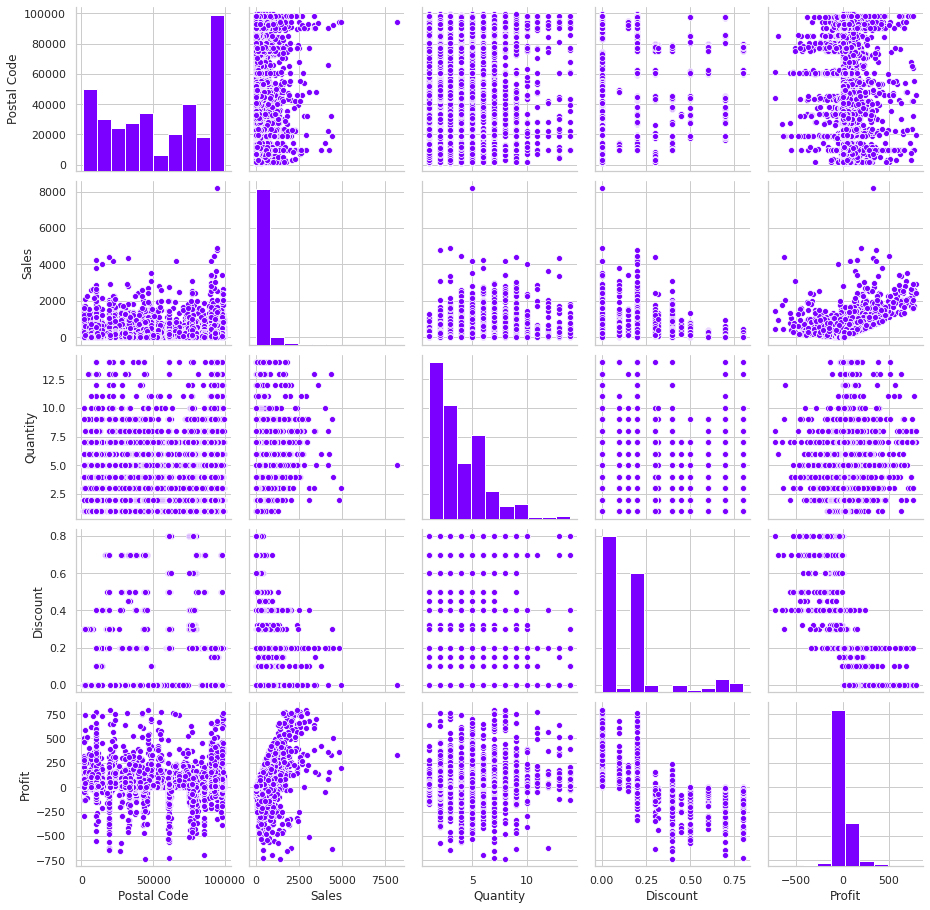

In [23]:
sns.set_palette('gist_rainbow_r')
sns.pairplot(ds)

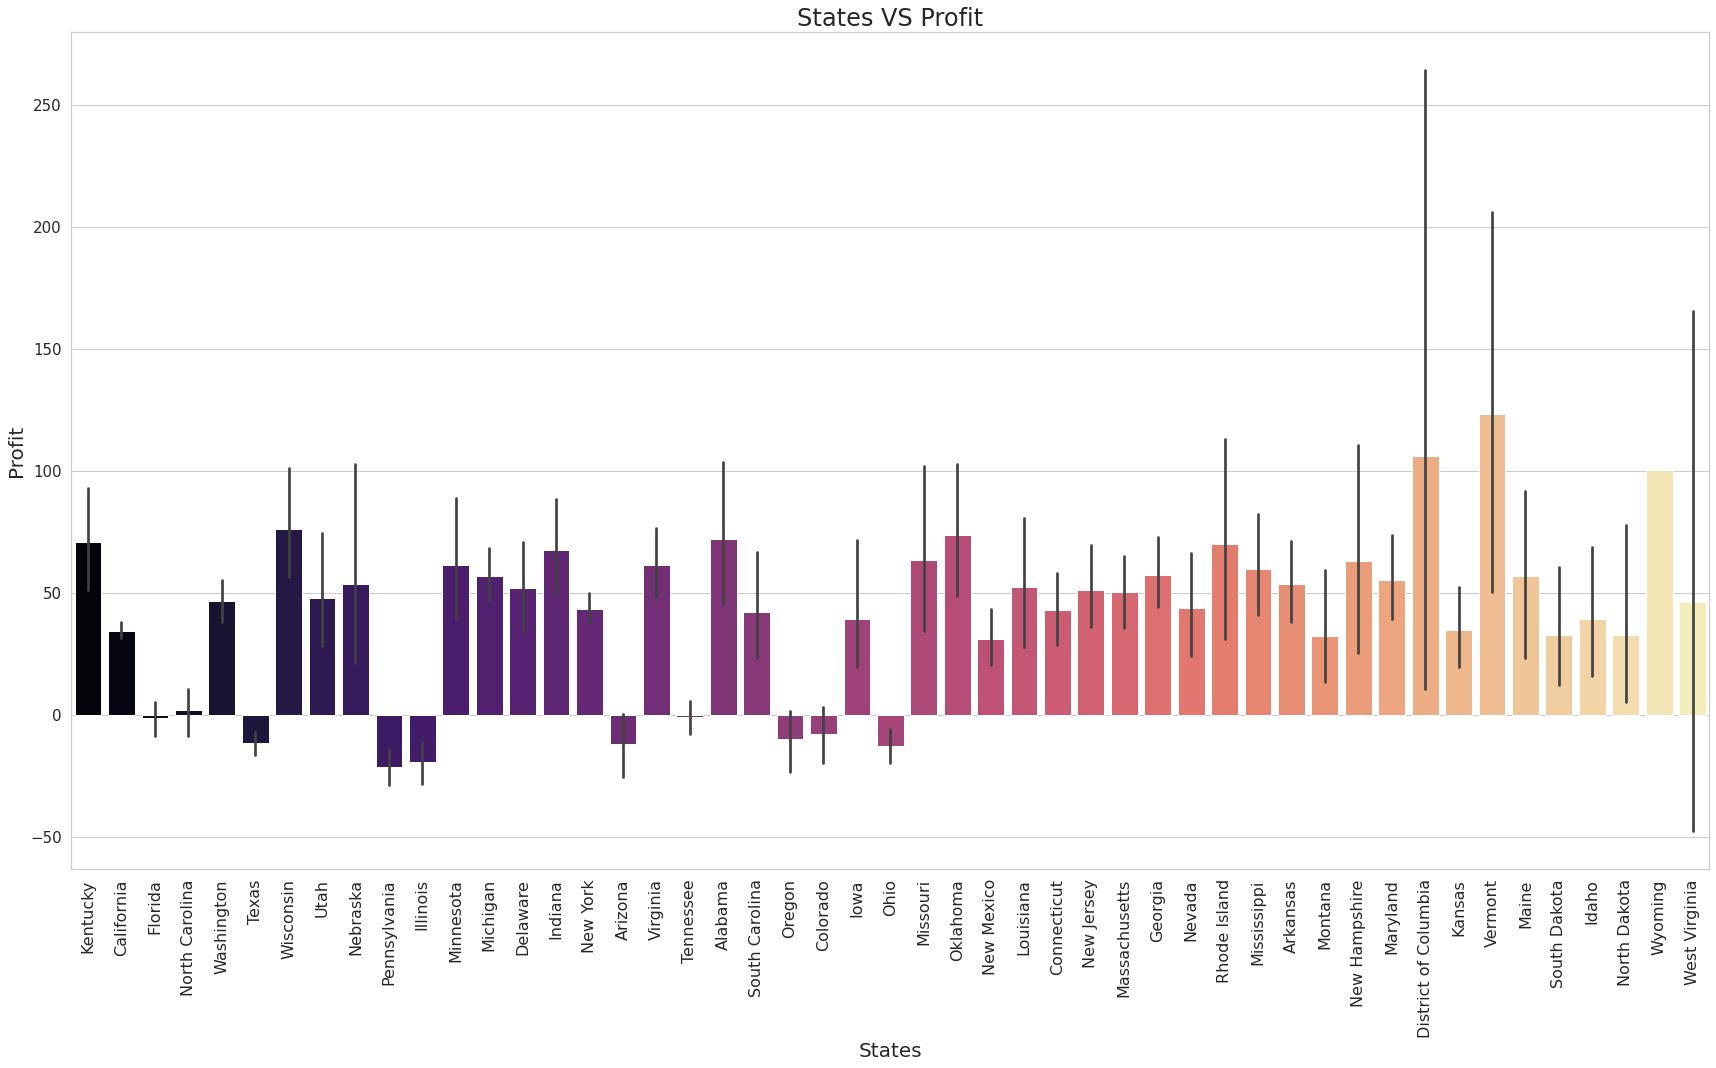

In [24]:
#State wise profit
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="magma",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

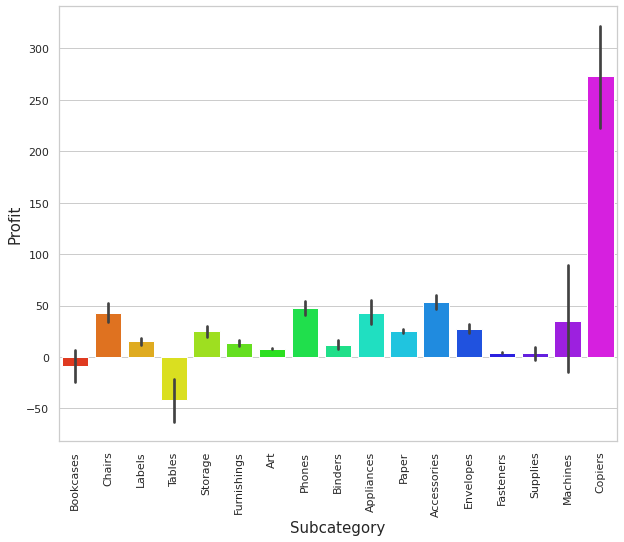

In [25]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="gist_rainbow")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

#Conclusions
- Generally people buy items in 2 or 4 quantity , this signifies that most stores are in residential areas where families live and buy their essentials.
- Consumer count is highest in each case and they generally prefer 'Standard Class'.
- In case of sales not much difference is seen based on the Segments for any region. Overall 'Corporate' is leading a bit.
- In each and every every region, sales for 'Office Supplies' are very poor. Furniture and Technology are well ahead.
-   'District of Columbia', 'Vermont','Wyoming' states are generating highest profits. And States like 'Texas', 'Pennsylvania','Illinois','Arizona','Oregon','Colorado','Ohio' are generating losses. Hence focus has to be given in such States.
- 'Copiers' are gaining huge profit. But 'Tables' and 'Bookcases' are going with loss. Respective steps are to be taken to improve the business in these Subcategories.